## ALGORITHM DESIGN AND COMPARISON FOR AN OPTIMIZATION PROBLEM
#### Submitted by Group - 6 (Batch: Sep2021)

1. Divya Das (s5426634)
2. Angel Rose Ambrose (s5332769)
3. Barnabas Madu (s5419903)
4. Nishant Bhikhabhai Thaker (s5230336)
5. Mamatha Murali (s5429007)

### Delivery Planning for the LPG Distributor - SAO Gas Ltd (Both Problem 1 and 2 are in this file)
* Location: Country of Optilandia
* SAO Depot: 5
* SAO Vehicles : 25 Tanker Lorries

### Data Set provided
1. SaO_Optilandia_locations.csv
    * This file consists of the Location IDs, x and y coordinates of the depots, customers and all connecting nodes, capacity of their tank and current fuel level.
    
2. SaO_Optilandia_links.csv
    * This file consists the connections or links between nodes which forms the path or roads of Optilandia
3. SaO_Optilandia_depot_lorries.json
    * This files consists of Lorry details i.e lorry IDs, capacity, cost per mile(cpm) and cost per mile per tonne(cptm) in a JSON file.

### The Problems:
The problem is a MDCVRP (Multi Depot Capacitated Vehicle Routing Problem) with 5 depot with each depot having 5 vehicle. There are three type of vehicle with different capacity and cost. We have to schedule the delivery plan for gas by SAO Gas Ltd in Optilandia Country.
### The Aproach: 
We followed Cluster Route Cluster technique to solve the problem: <br/>
1. First we cluster all the customers into 5 groups for 5 depots depending on its distance from the depots
2. Then we apply the algorithms to get the most optimized sequence of customers to be followed for each problem. <br/>* For Problem 1 we used Genetic algorithm to minimize time <br/>* For Problem 2 we used Greedy Scheduler to maximize the cost efficiency
3. Finally, we divided the path or sequence received from step 2 into routes for different vehicle depending on the contraints.


### OPTIMIZATION SCHEMES UTILIZED
#### 1. GENETIC ALGORITHM OPTIMIZATION
Genetic Algorithm is an optimization algorithm inspired from the natural optimization process i.e. Natural Selection in Evolution and is one of the class Evolutionary Algorithm. It is developed in 1975 by John Holland at the University of Michingan for Machine Learning.
In our problem, we consider each customer, depot and any other location (with an x, y) coordinate as a node (generally a gene in Genetic Algorithm), all the nodes i.e. customers clustered to a depot is considered to form a path (generally a chromosome in Genetic Algorithm) which is the input or basic of the genetic algorithm.
Steps of GA 
>* Start
>* Initialize Population
>* Fitness Evaluation
>* Selection of Parents
>* Crossover parents
>* Mutation child/offspring
>* Fitness Evaluation the new individuals
>* Selection for next generation
>* Repeat from Selection Untill the population Converge
>* Stop

**Initialize** <br/> Initialize Step generate the initial population from the input. In our problem we take path(all customer nodes of a depot) as input and random shuffle to form initial population.

**Fitness Evaluation** <br/> Problem 1 is to minimize the time which is directly proportional to distance so our Fitness evaluation function finds the total distance of a path from and back to depot after serving all customer and compare.

**Selection** <br/> Selection step selects the parent or best paths from current population to generate ofsprings for next generation. Here we have used tournament selection method, in which random paths are selected and compete against each other and best or fittest paths are selected as parents.

**Crossover** <br/> In crossover step selected parents are combined to form offspring or child. Here we are using single point crossover. First trunk the parents into two and the later end is exchanged between the parents but this generates invalid paths with repeated nodes. So we exchange the repeating nodes from the former half to make valid offsprings or childs.

**Mutation** <br/> Muation is to modify some nodes in the path but in here modifying can result in invalid path so here we used inversion mutation in which we randomly select a part of the path and invert the order of the nodes in that part.

#### 2. GREEDY SCHEDULER
Greedy Scheduler is used to generate and schedule the path. Greedy algorithm makes the choice of next step at current step only that is it thinks only 1 step ahead. Here the greedy algorithm moves to the next nearest node and proceeds like that to all the customers to minimize the coat and eventually maximize the cost efficiency. In our scheduler we introduced various function to restrict the constraints specified in the problem.


### Libraries Used
#### NetworkX Graph Library
The code uses Networkx library to plot the graph of the Country of Optilandia by calculataing the Eucladean distance between the nodes using the coordinates provided in dataset file 1 and squareform from scipy library.

>**all_pairs_dijkstra_path_length() :** All Pair Dijikstra Shortest Path Algorithm is used from NetworkX Library to form a matrix of the distance between all the pair of nodes in the weighted network. It is then further used in the Fitness Calculation function for Problem 1 Genetic Algorithm and the Nearset Node Calculation function for Problem 2 Greedy Scheduler. 

>**multi_source_dijkstra() :** Multi Source Dijikstras Shortest Path Algorithm is used from NetworkX Library. It takes a node and a list of source nodes and find the source node at the shortest distance to the node, calculate its distance and nodes path to reach from source to node in a weighted graph or network. Here it is used to divide and cluster the customers between the depots.

#### Pandas Library
Pandas is a software library for data manipulation and analysis. Here we are using Pandas library to convert the dataset files to dataframes and manipulate changes as per our requirement for algorithms.

#### NumPy Library
NumPy library is used to work with certain arrays and matrices in codes.

#### Matplot Library
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Here we used this library to plot graphs to viualize the optimization results.

#### Json Library
Json Libary is used to read and write json files

#### Random Library
Random library used whereever we need to select random numbers from a range or randomly shuffle etc.

<br/>

<br/>

<br/>

<br/>

## Problem1: 

### Tasks
1. Schedule LPG delivery to all customers in order to fully fill their tanks to minimise the overall dispatch time for delivery
2. No additional constrains apart from the tanker lorry capacity .

### METHODOLOGY USED TO SOLVE
 1. All the data provided with the problem are read and converted to usable dataframe format
 2. Visualizing the network only with nodes and with depots and customers 
 3. Dividing and alocating the customers to nearest depot by calculating Dijikstras shortest path
 4. Visualizing each depot's alocated customers individually
 5. Applied Genetic Algorithm to get the optimized path for each depot
 6. Path received for each depot is divided into 5 path each for the vehicle depending on the vahicle capacity and customer demand
 7. Final paths is converted to single dictionary and exported as JSON solution File

### Important Points Noticed
 * To minimize time the formula is <br/> 
     "Time(from one node to another) =(distance(miles)/speed(miles/hour))*60 + Weight(tonnes) * 10(min/tonne) + 5min"
   * in the above equation the Weight(tonnes)* 10(min/tonnes) and 5 min for customer location time will be equal in all path 
 * condition because we have to serve all the customer and fully fill them for Problem1
 * So, Time is directly proportional to distance
 * To minimize time minimize distance our fitness function will minimize distance here

## Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json
import random
from random import randrange
from time import time 
from scipy.spatial.distance import pdist, squareform

<br/>

<br/>

### Read Dataset provided
#### 1. SaO_Optilandia_locations.csv - contains customer locations
* read and convert the csv file to dataframe

In [2]:
loc = pd.read_csv('SaO_Optilandia_locations.csv')
loc['demand']=round(loc['capacity']-loc['level'],2) ### Calculated the needed Gas by subtracting level from capacity
loc.head(8)

FileNotFoundError: [Errno 2] No such file or directory: 'SaO_Optilandia_locations.csv'

#### 2. SaO_Optilandia_lnks.csv - contains linked location Ids
* read and convert the csv file to dataframe

In [ ]:
links = pd.read_csv('SaO_Optilandia_links.csv')
links.head(8)

<br/>

#### 3. SaO_Optilandia_depot_lorries.json - contains lorry details for each depot

In [ ]:
lorryd = json.load(open('SaO_Optilandia_depot_lorries.json'))
lorryc=[]
d_ind=0
for i in lorryd.keys():
    for j in range(0,len(lorryd[i])):
        lorryc.append(pd.DataFrame(lorryd[i][j],index=[d_ind]))
        d_ind+=1
lorry=pd.concat(lorryc)
lorry['depot']=lorry['lorry_id'].apply(lambda x: int(x.split('-')[0]))
lorry['stop'] = np.where(lorry['capacity']==5, 4,np.where(lorry['capacity']==12, 8, np.where(lorry['capacity']==22, 16,0)))
lorry

### Visualizing all existing nodes for all locations in network

In [ ]:
# Calculating the Euclidean distance between the coordinates of all the locations
xy=loc[['x','y']]
eucl_dis= squareform(pdist(xy.values))
edges  = [(id1,id2,eucl_dis[id1,id2]) for _,(id1,id2) in links.iterrows()]
edgedict = dict([((df.id1, df.id2), eucl_dis[df.id1, df.id2]) for df in links.itertuples()])

#Graph
g=nx.Graph()
g.add_weighted_edges_from(edges)
pos= dict([(df.id, (df.x, df.y)) for df in loc.itertuples()])
plt.figure(figsize=(20,10))
plt.title("Optilandia Country Network",fontsize=20)
nx.draw(g,with_labels=False,pos=pos,node_color='g',node_size=50,alpha =0.5)

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

### Visualizing customer locations and depot locations in that network

In [ ]:
#Blue - customer nodes, red - depot, green - non-customer nodes

cust_loc_ids = [df.id for df in loc.loc[loc.is_customer==True].itertuples()]
depot_loc_ids = [df.id for df in loc.loc[loc.is_depot==True].itertuples()]
plt.figure(figsize=(20,10))
plt.title("SaO Gas Ltd- Depot (red) & Customers (blue)",fontsize=20)
nx.draw(g,with_labels=False,pos=pos,node_color='g',node_size=50,alpha=0.5)
nx.draw_networkx_nodes(g,pos,nodelist=depot_loc_ids,node_color='r',node_size=600,alpha=1);
nx.draw_networkx_labels(g,pos,{k:k for k in depot_loc_ids});
nx.draw_networkx_nodes(g,pos,nodelist=cust_loc_ids,node_color='#003ec0',node_size=250,alpha=0.5);

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

<br/>

### Dividing Customers into 5 group for 5 Depot
#### Distance between every pair of nodes is calculated

In [ ]:
pair_dist=dict(nx.all_pairs_dijkstra_path_length(g))
pair_path=dict(nx.all_pairs_dijkstra_path(g))
shd_graph=np.array([[pair_dist[i][j] for i in range(len(g.nodes))] for j in range(len(g.nodes))]) 

#### Finding the neraest depot for each node in network

In [ ]:
paths_length,paths_path=nx.multi_source_dijkstra(g,depot_loc_ids)
cust_paths=dict()
for i in paths_length.keys():             ## Deriving only customer nodes from the data
    if i in cust_loc_ids:
        cust_paths[i]=(paths_path[i],paths_length[i])

#### Derived customer data is seperated for each depot into a dict

In [ ]:
depot_dict = {523:[], 127:[], 373:[], 167:[], 124:[]}
for i in cust_paths.values():
    for j in depot_dict.keys():
        if i[0][0]== j:
            depot_dict[j].extend(i[0])
                    
all_523= list(dict.fromkeys(depot_dict[523]))
all_127= list(dict.fromkeys(depot_dict[127]))
all_373= list(dict.fromkeys(depot_dict[373]))
all_167= list(dict.fromkeys(depot_dict[167]))
all_124= list(dict.fromkeys(depot_dict[124]))

#### Seperating only customer from the all nodes list to customer only list

In [ ]:
def CustomerOnly(depot, nodes):
    cnt=0
    custnodes=[]
    for i in nodes:
        if i in cust_loc_ids:
            custnodes.append(i)
    return custnodes
cust_523= CustomerOnly(523,all_523) ## Input for the algorithms
cust_127= CustomerOnly(127,all_127)
cust_373= CustomerOnly(373,all_373)
cust_167= CustomerOnly(167,all_167)
cust_124= CustomerOnly(124,all_124)

### Visualizing customer nodes of each depot seperately

In [ ]:
def DepotSubgraph(depot,all_depot):
    plt.figure(figsize=(20,10))
    plt.margins(0,0)
    plt.title(f"Customers allocated for depot {depot} ",fontsize=18)
    nx.draw(g,with_labels=False,pos=pos,node_color='#94bf06',node_size=50,alpha=0.5)
    nx.draw_networkx_nodes(g,pos,nodelist=[depot],node_color='r',node_size=400,alpha=1);
    nx.draw_networkx_labels(g,pos,{k:k for k in all_depot});
    nx.draw_networkx_nodes(g,pos,nodelist={k: k for k in cust_loc_ids if k not in [depot] and k in all_depot},
                           node_color='#003ec0',node_size=200,alpha=1);
    
DepotSubgraph(523,all_523)
DepotSubgraph(127,all_127)

In [ ]:
DepotSubgraph(373,all_373)
DepotSubgraph(167,all_167)
DepotSubgraph(124,all_124)

<br/>

<br/>

#### Function to make a path for list of customer

In [ ]:
def makePathList(depot, sortedCustomers,G):
    pathFinal=[depot]
    for i in range(len(sortedCustomers)-1):
        p=nx.dijkstra_path(G, sortedCustomers[i], sortedCustomers[i+1])
        pathFinal.extend(p[1:])
    return pathFinal

In [ ]:
def DepotPathgraph(depot,all_depot,best_path):
    g1=g.subgraph(all_depot)
    plt.figure(figsize=(20,10))
    plt.title(f"Path for depot {depot} ",fontsize=20)
    nx.draw(g1,with_labels=False,pos=pos,node_color='#94bf06',node_size=50,alpha=1)
    nx.draw_networkx_nodes(g1,pos,nodelist=[depot],node_color='r',node_size=400,alpha=1);
#     nx.draw_networkx_nodes(g1,pos,nodelist=cust_depot,node_color='y',node_size=400,alpha=1);
    nx.draw_networkx_labels(g1,pos,{k:k for k in all_depot});
    nx.draw_networkx_nodes(g1,pos,nodelist={k: k for k in cust_loc_ids if k not in [depot] and k in all_depot},node_color='#003ec0',node_size=200,alpha=1);
    ed=[]
    ed.append(list(zip(best_path, best_path[1:])))
    for edge in ed:
        nx.draw_networkx_edges(g1,pos,edgelist=list(edge),alpha=1,edge_color='r',width=5.0)

<br/>

<br/>

## Genetic Algorithm
#### Defining a class to represent the VRP problem

In [ ]:
class VRP_modules(object):
    
    def __init__(self,nodes,path_length,fitness):
        self.nodes= nodes
        self.path_length= path_length
        self.fitness= fitness
    
    def mutation(self, path, prob):   
        def inver_mut(path_temp):  ### Inversion Mutation - chose random node in path and swap them
            path = path_temp
            i = randrange(0,len(path))
            j = randrange(i,len(path))
            path_mid = path[i:j]
            path_mid.reverse()
            path_result = path[0:i] + path_mid + path[j:]
            return path_result
        temp = []
        for _ in range(len(path)):
            if random.random() < prob :
                temp = inver_mut(path)
        return temp

    def crossover(self,parent1, parent2):
        def repeating_co(rep_child1,rep_child2):
            count1=0
            for gen1 in rep_child1[:pos]:
                rep = 0
                rep = rep_child1.count(gen1)
                if rep > 1:
                    count2=0
                    for gen2 in parent1[pos:]:
                        if gen2 not in rep_child1:
                            child1[count1] = parent1[pos:][count2]
                        count2+=1
                count1+=1
            count1=0
            for gen1 in rep_child2[:pos]:
                rep = 0
                rep = rep_child2.count(gen1)
                if rep > 1:
                    count2=0
                    for gen2 in parent2[pos:]:
                        if gen2 not in rep_child2:
                            child2[count1] = parent2[pos:][count2]
                        count2+=1
                count1+=1
            return [child1,child2]
        pos=random.randrange(1,self.path_length-1)
        child1 = parent1[:pos] + parent2[pos:] 
        child2 = parent2[:pos] + parent1[pos:] 
        return  repeating_co(child1, child2)

#### Function to check the fitness or fitness calculator

In [46]:
def path_fit(cpath):    
    path= cpath
    fitness = 0
    inv_path = 0
    for i in path[1:]:
        repeat = 0
        repeat = path.count(i) 
        if repeat > 1:
            inv_path+= 100 * abs(repeat - len(path))

    for i in range(len(path)-2):
        fitness= fitness + pair_dist[path[i]][path[i+1]] + inv_path
    return fitness

#### Genetic Algorithm function

In [47]:
def gen_algo(VRP_modules,s_node,k,opt,ngen,size,ratio_cross,prob_mutate,iteration):
   
    best=[]
    def in_pop(VRP_modules,size):   
        def generate_path():
            path=[]
            for i in VRP_modules.nodes:
                path.append(i)
            random.shuffle(path)
            return path
        return [generate_path() for _ in range(size)]
                    
    def new_gen(VRP_modules,k,opt,population,n_parents,n_sel,prob_mutate):
        
        def tournament_sel(VRP_modules,population,n,k,opt):
            winners=[]
            for _ in range(n):
                sel_path = random.sample(population,k)
                winners.append(opt(sel_path,key=VRP_modules.fitness))
            return winners
        
        def crossover1(VRP_modules,parents):
            childs=[]
            for i in range(0,len(parents),2):
                childs.extend(VRP_modules.crossover(parents[i],parents[i+1]))
            return childs
    
        def mutate(VRP_modules,population,prob):
            for i in population:
                VRP_modules.mutation(i,prob)
            return population
                        
        selected = tournament_sel(VRP_modules, population, n_sel, k, opt)
        crosses = crossover1(VRP_modules,
                                tournament_sel(VRP_modules, population, n_parents, k, opt))
        mutations = mutate(VRP_modules, crosses, prob_mutate)
        new_gen1 = selected + mutations
        
        return new_gen1
    
    for iteration in range(iteration):    
        population = in_pop(VRP_modules, size)
        n_parents = round(size*ratio_cross)
        n_parents = (n_parents if n_parents%2==0 else n_parents-1)
        n_sel = size - n_parents

        for _ in range(ngen):
            population = new_gen(VRP_modules, k, opt, population, n_parents, n_sel, prob_mutate)


        for i in range(size):
            l=VRP_modules.path_length
            population[i].insert(0,s_node)
            population[i].insert(l+1,s_node)


        bestPath = opt(population, key = VRP_modules.fitness)
        bestfit = VRP_modules.fitness(bestPath)
        print("Path: ", bestPath)
        print ("Fitness: " , bestfit)
        best.append(bestfit)

         ###for final best path after iteration
        if iteration == 0:
            best_fit_so_far = bestfit
            best_path_so_far = bestPath
        else:
            if bestfit < best_fit_so_far:
                best_fit_so_far = bestfit
                best_path_so_far = bestPath
            else:
                if bestfit > best_fit_so_far:
                    bestPath = best_path_so_far
    
    
    print("Best Path: ", bestPath)
    print ("Best Fitness: " , VRP_modules.fitness(bestPath))
    
    return (bestPath,VRP_modules.fitness(bestPath),best)



#### Plot the graph

In [48]:
def plot(best):
        
    plt.plot(best, '.-')
    plt.xlabel('Iteration')
    plt.ylabel('Distance/Time Fitness')
    plt.title("Genetic Algorithm Results for depot-")
    plt.show()

### Main Program
#### Each depot calling genetic algorithm to get optimized path

Path:  [523, 632, 491, 27, 257, 235, 519, 70, 603, 8, 225, 378, 183, 276, 136, 391, 94, 523]
Fitness:  27254.04685227219
Path:  [523, 136, 603, 391, 276, 70, 519, 491, 632, 27, 183, 235, 378, 225, 257, 94, 8, 523]
Fitness:  27381.37364241455
Path:  [523, 8, 225, 632, 94, 491, 27, 519, 257, 235, 183, 276, 603, 136, 70, 378, 391, 523]
Fitness:  27197.983037648028
Path:  [523, 94, 632, 27, 519, 70, 183, 235, 257, 378, 225, 8, 136, 603, 276, 391, 491, 523]
Fitness:  27070.126301826956
Path:  [523, 94, 632, 491, 519, 378, 603, 276, 391, 235, 257, 183, 225, 8, 70, 27, 136, 523]
Fitness:  27430.99556032541
Path:  [523, 378, 8, 225, 183, 257, 235, 519, 70, 276, 136, 603, 391, 491, 94, 27, 632, 523]
Fitness:  26903.73184315383
Path:  [523, 94, 632, 491, 27, 519, 235, 70, 257, 183, 225, 8, 378, 603, 136, 391, 276, 523]
Fitness:  26924.553867631523
Path:  [523, 8, 225, 257, 27, 70, 276, 391, 136, 603, 519, 491, 632, 94, 235, 183, 378, 523]
Fitness:  27071.580185752402
Path:  [523, 391, 603, 276, 

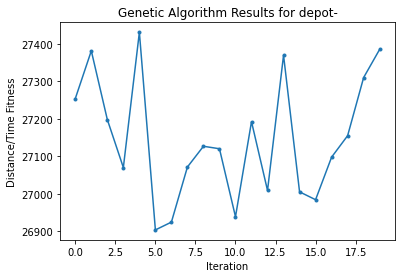

In [49]:
# MAIN PROGRAM for Depot 523
Depot_523 = VRP_modules(cust_523,len(cust_523),lambda x: path_fit(x))
path,distance,best = gen_algo(Depot_523,523, 2, min, 500, 100, 0.8, 0.05,20)
final_path_523=path
plot(best)

Path:  [127, 265, 380, 387, 77, 534, 308, 5, 113, 624, 585, 255, 82, 628, 550, 146, 584, 511, 65, 41, 612, 31, 398, 243, 127]
Fitness:  56778.174175422755
Path:  [127, 77, 387, 624, 585, 82, 612, 255, 398, 146, 265, 511, 113, 65, 534, 628, 550, 5, 308, 243, 584, 31, 380, 41, 127]
Fitness:  56997.78526490385
Path:  [127, 41, 398, 265, 31, 380, 584, 255, 5, 113, 387, 82, 628, 612, 585, 511, 550, 65, 77, 534, 308, 624, 146, 243, 127]
Fitness:  56882.03584978957
Path:  [127, 628, 398, 243, 31, 265, 511, 584, 380, 146, 255, 585, 308, 41, 387, 113, 5, 624, 550, 82, 65, 534, 77, 612, 127]
Fitness:  56382.64114941829
Path:  [127, 77, 41, 534, 387, 65, 628, 585, 255, 550, 308, 584, 380, 5, 113, 624, 146, 243, 265, 31, 398, 82, 612, 511, 127]
Fitness:  56305.954195167906
Path:  [127, 243, 31, 380, 398, 82, 585, 624, 5, 113, 511, 265, 584, 77, 41, 534, 308, 65, 387, 550, 146, 255, 628, 612, 127]
Fitness:  56088.90942551921
Path:  [127, 77, 113, 5, 628, 612, 82, 585, 255, 584, 511, 624, 265, 31, 3

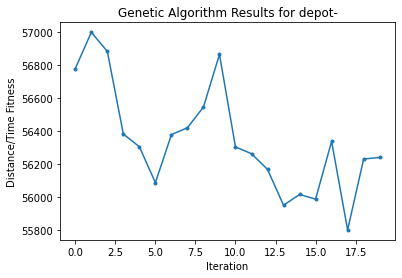

In [50]:
# MAIN PROGRAM for Depot 127
Depot_127 = VRP_modules(cust_127, len(cust_127), lambda x: path_fit(x))
path,distance,best = gen_algo(Depot_127,127, 2, min, 500, 100, 0.8, 0.05,20)
final_path_127=path
plot(best)

Path:  [373, 474, 543, 389, 270, 337, 103, 216, 100, 180, 200, 431, 455, 135, 144, 22, 190, 497, 531, 29, 332, 13, 547, 377, 78, 205, 364, 520, 86, 172, 294, 373]
Fitness:  94461.13738292315
Path:  [373, 543, 103, 431, 13, 78, 270, 497, 474, 190, 22, 455, 294, 135, 144, 100, 520, 205, 364, 547, 200, 377, 332, 389, 172, 531, 29, 180, 337, 86, 216, 373]
Fitness:  93997.4209886479
Path:  [373, 377, 547, 205, 103, 337, 180, 86, 29, 543, 531, 172, 389, 520, 497, 22, 144, 135, 13, 455, 294, 270, 100, 190, 364, 216, 78, 431, 332, 200, 474, 373]
Fitness:  94964.86102704408
Path:  [373, 270, 13, 86, 332, 389, 543, 29, 531, 172, 377, 205, 216, 78, 455, 294, 135, 22, 144, 190, 200, 497, 474, 180, 337, 103, 520, 100, 431, 547, 364, 373]
Fitness:  93791.58892147856
Path:  [373, 135, 455, 216, 364, 205, 103, 78, 431, 377, 270, 337, 547, 86, 531, 29, 389, 520, 474, 294, 200, 180, 100, 13, 332, 172, 497, 144, 190, 22, 543, 373]
Fitness:  94465.99710162895
Path:  [373, 22, 543, 497, 431, 547, 13, 200, 

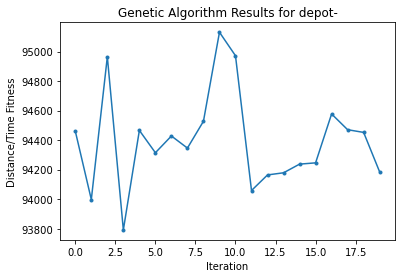

In [51]:
# MAIN PROGRAM for Depot 373
Depot_373 = VRP_modules(cust_373, len(cust_373), lambda x: path_fit(x))
path,distance,best = gen_algo(Depot_373,373, 2, min, 500, 100, 0.8, 0.05,20)
final_path_373=path
plot(best)

Path:  [124, 542, 14, 177, 362, 372, 254, 206, 633, 36, 147, 171, 397, 220, 539, 507, 63, 130, 449, 160, 264, 260, 245, 476, 175, 400, 204, 411, 202, 446, 374, 566, 408, 169, 118, 324, 418, 606, 124]
Fitness:  143327.41654915843
Path:  [124, 160, 446, 542, 14, 254, 372, 264, 206, 171, 147, 418, 220, 476, 245, 202, 400, 63, 130, 397, 539, 449, 566, 411, 204, 408, 118, 362, 324, 169, 36, 260, 374, 175, 633, 177, 606, 507, 124]
Fitness:  142359.53464857923
Path:  [124, 539, 633, 245, 449, 63, 130, 400, 374, 476, 264, 324, 169, 372, 397, 220, 175, 566, 446, 408, 177, 606, 362, 260, 411, 507, 36, 171, 542, 204, 418, 160, 147, 254, 206, 14, 118, 202, 124]
Fitness:  142600.76017294652
Path:  [124, 411, 507, 566, 449, 14, 418, 476, 245, 202, 254, 372, 36, 542, 539, 260, 633, 400, 160, 63, 374, 175, 446, 220, 264, 169, 397, 147, 171, 204, 324, 177, 118, 408, 206, 606, 362, 130, 124]
Fitness:  142829.19743891148
Path:  [124, 202, 175, 400, 507, 36, 542, 14, 204, 476, 446, 539, 63, 130, 374, 160,

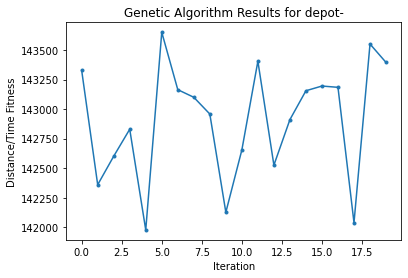

In [52]:
# MAIN PROGRAM for Depot 124
Depot_124 = VRP_modules(cust_124, len(cust_124), lambda x: path_fit(x))
path,distance,best = gen_algo(Depot_124,124, 2, min, 500, 100, 0.8, 0.05,20)
final_path_124=path
plot(best)

Path:  [167, 64, 210, 105, 214, 598, 44, 569, 271, 453, 621, 110, 73, 437, 528, 459, 80, 274, 393, 32, 167]
Fitness:  38683.00219872458
Path:  [167, 210, 105, 32, 73, 64, 459, 528, 437, 598, 453, 621, 271, 569, 393, 274, 80, 110, 44, 214, 167]
Fitness:  38467.32600149962
Path:  [167, 44, 393, 569, 274, 80, 598, 214, 110, 64, 32, 105, 210, 459, 437, 528, 621, 453, 271, 73, 167]
Fitness:  38478.226354029575
Path:  [167, 214, 105, 210, 64, 437, 528, 459, 32, 73, 621, 110, 598, 80, 271, 274, 393, 569, 44, 453, 167]
Fitness:  38394.8846275592
Path:  [167, 32, 105, 210, 598, 110, 274, 393, 44, 569, 271, 453, 621, 73, 64, 80, 528, 437, 459, 214, 167]
Fitness:  38332.91483647759
Path:  [167, 44, 393, 274, 598, 528, 621, 110, 64, 459, 437, 73, 32, 214, 80, 453, 271, 105, 210, 569, 167]
Fitness:  38830.51255346008
Path:  [167, 44, 393, 274, 598, 214, 80, 528, 459, 437, 271, 453, 621, 569, 210, 105, 73, 64, 32, 110, 167]
Fitness:  38683.50186715604
Path:  [167, 453, 80, 528, 437, 32, 64, 210, 598

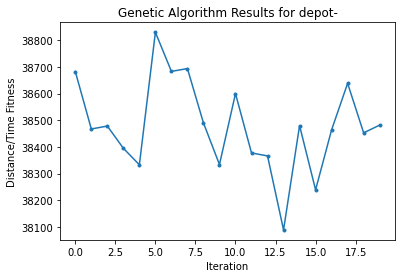

In [53]:
# MAIN PROGRAM for Depot 167
Depot_167 = VRP_modules(cust_167, len(cust_167), lambda x: path_fit(x))
path,distance,best = gen_algo(Depot_167,167, 2, min, 500, 100, 0.8, 0.05,20)
final_path_167=path
plot(best)

#### Path Divider function divides the path from each depot into 5 paths as per vehicle capacity and customer demand

In [54]:
def path_divider(path,veh_cap,cust_dem,depot):
    z=depot
    all_path=[]
    all_cust_dem=[]
    for key in veh_cap:
        v_cap = veh_cap[key]
        c_dem = 0
        path1=[]
        all_cust_dem1=[]
        path1.append(z)
        all_cust_dem1.append((z,v_cap))
        for i in path:
            if i == z:
                continue
            c_dem+=cust_dem[i]
            if c_dem <= v_cap:
                path1.append(i)
                r_cap=-1*(cust_dem[i])
                all_cust_dem1.append((i,r_cap))
        path1.append(z)
        all_cust_dem1.append((z,0))
        with_lorryid=[key,all_cust_dem1]
        Lorry_key=["lorry_id","loc"]
        all_cust_dem_dict = dict(zip(Lorry_key, with_lorryid))
        all_path.append(path1)
        all_cust_dem.append(all_cust_dem_dict)
        for a in path1:
            if a in path:
                path.remove(a)
    return(all_path,all_cust_dem)

#### Preparing data from data frame for path dividing

In [55]:
veh_523 = lorry.loc[lorry["depot"] == 523]
veh_cap_523 = dict(zip(veh_523.lorry_id, veh_523.capacity)) 
veh_127 = lorry.loc[lorry["depot"] == 127]
veh_cap_127 = dict(zip(veh_127.lorry_id, veh_127.capacity)) 
veh_373 = lorry.loc[lorry["depot"] == 373]
veh_cap_373 = dict(zip(veh_373.lorry_id, veh_373.capacity)) 
veh_167 = lorry.loc[lorry["depot"] == 167]
veh_cap_167 = dict(zip(veh_167.lorry_id, veh_167.capacity)) 
veh_124 = lorry.loc[lorry["depot"] == 124]
veh_cap_124 = dict(zip(veh_124.lorry_id, veh_124.capacity)) 

loc1 = loc.loc[(loc["is_depot"] == True) | (loc["is_customer"] == True)]
loc1 = loc1.drop(columns=["x","y","is_depot", "is_customer", "capacity","level"])

cust_dem_523 = loc1[loc1['id'].isin(cust_523)]
cust_dem_523 = cust_dem_523.to_dict()
it = iter(cust_dem_523.values())    
first, cust_dem_523 = next(it), next(it)   

cust_dem_127 = loc1[loc1['id'].isin(cust_127)]
cust_dem_127 = cust_dem_127.to_dict()
it = iter(cust_dem_127.values())    
first, cust_dem_127 = next(it), next(it)  

cust_dem_373 = loc1[loc1['id'].isin(cust_373)]
cust_dem_373 = cust_dem_373.to_dict()
it = iter(cust_dem_373.values())    
first, cust_dem_373 = next(it), next(it) 

cust_dem_167 = loc1[loc1['id'].isin(cust_167)]
cust_dem_167 = cust_dem_167.to_dict()
it = iter(cust_dem_167.values())    
first, cust_dem_167 = next(it), next(it)

cust_dem_124 = loc1[loc1['id'].isin(cust_124)]
cust_dem_124 = cust_dem_124.to_dict()
it = iter(cust_dem_124.values())    
first, cust_dem_124 = next(it), next(it) 


#### Dividing path individually for each depot

In [56]:
all_path_523, path_dem_523= path_divider(final_path_523,veh_cap_523,cust_dem_523,523)
all_path_127, path_dem_127 = path_divider(final_path_127,veh_cap_127,cust_dem_127,127)
all_path_373, path_dem_373 = path_divider(final_path_373,veh_cap_373,cust_dem_373,373)
all_path_167, path_dem_167 = path_divider(final_path_167,veh_cap_167,cust_dem_167,167)
all_path_124, path_dem_124 = path_divider(final_path_127,veh_cap_124,cust_dem_124,124)

final_result = path_dem_523 + path_dem_127 + path_dem_373 + path_dem_167 + path_dem_124
print(final_result)

[{'lorry_id': '523-0', 'loc': [(523, 5), (378, -0.54), (8, -0.2), (225, -0.64), (183, -0.4), (257, -0.2), (235, -0.36), (519, -0.21), (70, -1.46), (276, -0.93), (523, 0)]}, {'lorry_id': '523-1', 'loc': [(523, 5), (136, -0.34), (603, -0.86), (391, -1.0), (491, -0.34), (94, -1.52), (523, 0)]}, {'lorry_id': '523-2', 'loc': [(523, 12), (27, -1.02), (632, -1.24), (523, 0)]}, {'lorry_id': '523-3', 'loc': [(523, 12), (523, 0)]}, {'lorry_id': '523-4', 'loc': [(523, 22), (523, 0)]}, {'lorry_id': '127-0', 'loc': [(127, 5), (511, -0.24), (584, -0.22), (243, -0.67), (31, -0.56), (265, -0.48), (380, -0.16), (398, -0.89), (585, -1.41), (127, 0)]}, {'lorry_id': '127-1', 'loc': [(127, 5), (550, -0.46), (624, -0.51), (146, -1.45), (113, -0.45), (308, -0.68), (534, -1.19), (127, 0)]}, {'lorry_id': '127-2', 'loc': [(127, 12), (41, -1.03), (65, -0.72), (5, -0.1), (255, -0.17), (82, -0.6), (612, -0.79), (628, -1.27), (387, -1.24), (77, -1.47), (127, 0)]}, {'lorry_id': '127-3', 'loc': [(127, 12), (127, 0)]}

#### Encoder for json

In [57]:
class Encoder(json.JSONEncoder):
    def default(self, obj):
         if isinstance(obj, np.integer):
            return int(obj)
         elif isinstance(obj, np.floating):
            return float(obj)
         elif isinstance(obj, np.ndarray):
            return obj.tolist()
         else:
            return super(NpEncoder, self).default(obj)

#### Coverting dictionary to json nd exporting

In [58]:
import json

with open('SAO_Optilandia_Solution_1.json', 'w') as outfile:
    
    json.dump(final_result, outfile, cls=Encoder)

## Problem 2: 

### Tasks
Schedule LPG delivery to minimise the cost efficiency, where cost efficiency = Total gas delivered to all customer/ Total overall cost
Contraints
1. Each lorry must stop for 20 minutes after every 2 hours continuous driving
2. Lorry with small tank can stop only 4 times, medium one only 8 times and large one 12 times
3. Each Lorry can end and refill at any depot
4. All customer must have more than 50% gas, else penalty pound 1000 fine



### METHODOLOGY USED TO SOLVE
 1. Prepared Data and Depot allocation used from the Problem 1
 2. Applied to get most cost effective single path for each depot
 3. Path received for each depot is divided into 5 path each for the vehicle depending on the vahicle and customer demand
     * a. only serving not must csutomer if cost is less than 1000 or is in way to a must customer
     * b. preferabbly using larger vehicle first  because it can take longer trips and cost per tonne will reduce 
     * c. in case of need to refill utilizing other nearest depot

### Important Points Noticed
* To maximize efficiency the formula is 
*                    Cost Efficiency = Total Gas delivered to all customer/cost of delivery
*                       Cost(one node to next) =distance * (cpm + weight(tonnes) * cptm)                   
    *               where cpm-cost per mile of vehicle & cptm - cost per mile per tonne of vehicle
* To achieve above we will serve customer not must only if cost is below 1000 to reach them
* Will utilize Larger tanks initially if have more customers
* Can go to different nearest depot in case of refill
* 20 min break after 2 hours i.e after every  continuous 100 mile

## Library Import

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### Preparing data from the data files

In [60]:
# Make a customer only dataframe with location coordinates and details
cust_loc=loc.loc[loc['is_customer'] == True]      

# A dataframe to get the customers who has current level less than 50% of its total capacity
cust_must_df=cust_loc.loc[cust_loc['level']<cust_loc['capacity']*0.5]

# List of all depots
depot_list=loc.loc[loc['is_depot'] == True]['id'].tolist()

#list of all customers
cust_List=loc.loc[loc['is_customer'] == True]['id'].tolist()

# list of all customers to whome we should deliver fuel to avoid penalty 
cust_must=cust_must_df["id"].tolist()

### Greedy Search Method to reduce cost

#### Function to find nearest node from given list of node

In [61]:
def nearest_node(node,node_list):
    for i in node_list:
        if i==node:
            continue
        else:
            temp=pair_dist[node][i]
            nearest_node=[i,temp]
            break
    for i in node_list:
        if i == node:
            continue
        else:
            if pair_dist[node][i]<temp:
                temp = pair_dist[node][i]
                nearest_node=[i,temp]
    return nearest_node

#### Function to check penalty

In [62]:
### Applying contraint 4 - if not reaching any customer adding penalty 1000
def cust_penalty(cust,tripcost):
    if cust in cust_must:
        if tripcost>1000:
            return(True)
        else:
            return(False)
    return(True)

#### Function to calculate total gas delivered

In [63]:
def Total_gas_del(cust_dep,Unvisited_dep):
    temp_list = list(set(cust_dep) - set(Unvisited_dep))
    Total_Gas_Del = 0
    for i in temp_list:
        gas_delv = (loc.demand[loc.id==i]).iloc[0]
        Total_Gas_Del = Total_Gas_Del + gas_delv
    return(Total_Gas_Del)

#### One vehicle trip calculator function

In [64]:
def lorry_trip(veh_id, cus_list,depot):
    print('Vehicle begin trip at:',depot)
    stop= (lorry.stop[lorry.lorry_id == veh_id]).iloc[0]
    capacity=(lorry.capacity[lorry.lorry_id == veh_id]).iloc[0]
    cpm = (lorry.cpm[lorry.lorry_id == veh_id]).iloc[0]
    cptm = (lorry.cptm[lorry.lorry_id == veh_id]).iloc[0]
    c_cus=depot
    cus_list = cus_list
    unvisited_cus=[]
    n_cus=nearest_node(c_cus,cus_list)
    n=(loc.demand[loc.id==n_cus[0]]).iloc[0]
    trip=[(depot,capacity)]
    tripcost_list=[]
    
    while((len(cus_list)>0) and (capacity>=n) and (stop!=0)):
        cost= n_cus[1] * (cpm + (capacity * cptm))
        if (len(cus_list)==1 and (cust_penalty(n_cus[0],cost))):
            unvisited_cus.append(n_cus[0])  ### Applying contraint 4 - if not reaching any customer adding penalty 1000
            cus_list.remove(n_cus[0])
            tripcost_list.append(cost)
        else:
            if n_cus[1]>100:
                t=int(n_cus[1] // 100)
                for i in range(t):     ### Applying contraint 1 - adding 20 min break after 2 hours continuous drive
                    trip.append('20 min break')
            trip.append((n_cus[0],-n))
            stop=stop-1           ### Applying contraint 2 - small only 4 stop, medium 8stop and large 16 stop
            cus_list.remove(n_cus[0])
            cost= n_cus[1] * (cpm + (capacity * cptm))
            tripcost_list.append(cost)
            capacity=capacity-n
            c_cus=n_cus[0]
            if len(cus_list)!=0:
                n_cus=nearest_node(c_cus,cus_list)
                n=(loc.demand[loc.id==n_cus[0]]).iloc[0]
        

    tripcost=0
    for i in tripcost_list:
        tripcost=tripcost+i
    
    print('Vehicle end trip at:',trip[-1])
    return(trip,tripcost,cus_list,unvisited_cus)                                          
                                         

#### Vehicle selection function

In [65]:
def veh_sel(depot,cus_list,s,m,l):
    no_cust=len(cus_list)
    veh_sel_id = 0
    if no_cust > 8 and l != 0:
        veh_sel_id = (lorry.lorry_id[(lorry.depot==depot) & (lorry.capacity==22)]).iloc[0]
        l=l-1
    elif no_cust > 4 and m != 0:
        veh_ids = (lorry.lorry_id[(lorry.depot==depot) & (lorry.capacity==12)]).values.tolist()
        if len(veh_ids)==3 and m==3:
            veh_sel_id = veh_ids[2]
            m=m-1
        elif (len(veh_ids)==3 or len(veh_ids)==2) and m==2:
            veh_sel_id = veh_ids[1]
            m=m-1
        elif (len(veh_ids)==3 or len(veh_ids)==2 or len(veh_ids)==1) and m==1:
            veh_sel_id = veh_ids[0]
            m=m-1
    else:
        veh_ids = (lorry.lorry_id[(lorry.depot==depot) & (lorry.capacity==5)]).values.tolist()
        if len(veh_ids)==3 and s==3:
            veh_sel_id = veh_ids[2]
            s=s-1
        elif (len(veh_ids)==3 or len(veh_ids)==2) and s==2:
            veh_sel_id = veh_ids[1]
            s=s-1
        elif (len(veh_ids)==3 or len(veh_ids)==2 or len(veh_ids)==1) and s==1:
            veh_sel_id = veh_ids[0]
            s=s-1
    
    return (veh_sel_id,s,m,l)


#### Function Scheduling Plan using Greedy Method

In [66]:
def GreedyMethod(depot, cust_list):
    rem_cust_list = cust_list
    total_cost= 0
    route=[]
    unvisited_cust=[]
    s =len((lorry[(lorry.depot==depot) & (lorry.capacity==5)]).index)
    m =len((lorry[(lorry.depot==depot) & (lorry.capacity==12)]).index)
    l =len((lorry[(lorry.depot==depot) & (lorry.capacity==22)]).index)
    
    while((len(rem_cust_list)!= 0) and (s!=0 or m!=0 or l!=0)):
        ### select vehicle
        veh_id,s,m,l = veh_sel(depot,rem_cust_list,s,m,l)
        print('Vehicle Selected:',veh_id)
        ### generate trip for the vehicle
        trip, tripcost, rem_cust_list,unvisited_cust= lorry_trip(veh_id,rem_cust_list,depot)
        route_list=[veh_id,trip]
        Veh_key=["lorry_id","loc"]
        route_dict = dict(zip(Veh_key, route_list))
        route.append(route_dict)
        total_cost = total_cost + tripcost

     
    while (len(rem_cust_list))!=0:
        print("Next trip")
        s =len((lorry[(lorry.depot==depot) & (lorry.capacity==5)]).index)
        m =len((lorry[(lorry.depot==depot) & (lorry.capacity==12)]).index)
        l =len((lorry[(lorry.depot==depot) & (lorry.capacity==22)]).index)

        while((len(rem_cust_list)!= 0) and (s!=0 or m!=0 or l!=0)):
            ### select vehicle
            veh_id,s,m,l = veh_sel(depot,rem_cust_list,s,m,l)
            print('Vehicle Selected for next trip:',veh_id)
            ### find last customer served and nearest depot
            l_cus = route[veh_id][-1][0]
            c_depot = nearest_node(l_cus,[523,127,373,167,124]) ### Applying contraint 3 (going to any depot to refill)
            ### generate trip for the vehicle
            trip, tripcost, rem_cust_list, unvisited_cust= lorry_trip(veh_id, rem_cust_list,c_depot[0])
            route_list=[veh_id,trip]
            Veh_key=["lorry_id","loc"]
            route_dict = dict(zip(Veh_key, route_list))
            route.append(route_dict)
            total_cost = total_cost + tripcost
    
    for i in route:
        i['loc'].append((depot,0))
    
    return (route,total_cost,unvisited_cust)

### Main function
#### Each depot calling the Greedy Method function to find the optimized path

In [67]:
cust_523= CustomerOnly(523,all_523)
cust_127= CustomerOnly(127,all_127)
cust_373= CustomerOnly(373,all_373)
cust_167= CustomerOnly(167,all_167)
cust_124= CustomerOnly(124,all_124)
Route_523,Cost_523,Unvisited_523 = GreedyMethod(523, cust_523)
Total_gas_523 = Total_gas_del(CustomerOnly(523,all_523),Unvisited_523)
Route_127,Cost_127,Unvisited_127 = GreedyMethod(127, cust_127)
Total_gas_127 = Total_gas_del(CustomerOnly(127,all_127),Unvisited_127)
Route_373,Cost_373,Unvisited_373 = GreedyMethod(373, cust_373)
Total_gas_373 = Total_gas_del(CustomerOnly(373,all_373),Unvisited_373)
Route_167,Cost_167,Unvisited_167 = GreedyMethod(167, cust_167)
Total_gas_167 = Total_gas_del(CustomerOnly(167,all_167),Unvisited_167)
Route_124,Cost_124,Unvisited_124 = GreedyMethod(124, cust_124)
Total_gas_124 = Total_gas_del(CustomerOnly(124,all_124),Unvisited_124)

Final_Route= Route_523 + Route_127 + Route_373 + Route_167 + Route_124
print("Final route of trip is", Final_Route)
Total_Cost = Cost_523 + Cost_127 + Cost_373 + Cost_167 + Cost_124
print("Total cost of trip is", Total_Cost)
Total_Gas = Total_gas_523 + Total_gas_127 + Total_gas_373 + Total_gas_167 + Total_gas_124
print("Total Gas delivered is", Total_Gas)
Cost_Efficiency = (Total_Gas/Total_Cost)
print("Cost Efficiency is", Cost_Efficiency)
Unvisited_Cus = Unvisited_523 + Unvisited_127 + Unvisited_373 + Unvisited_167 + Unvisited_124
print("Unvisited Customers are", Unvisited_Cus)

Vehicle Selected: 523-4
Vehicle begin trip at: 523
Vehicle end trip at: (378, -0.54)
Vehicle Selected: 127-4
Vehicle begin trip at: 127
Vehicle end trip at: (77, -1.47)
Vehicle Selected: 127-3
Vehicle begin trip at: 127
Vehicle end trip at: (243, -0.67)
Vehicle Selected: 373-4
Vehicle begin trip at: 373
Vehicle end trip at: (455, -0.3)
Vehicle Selected: 373-3
Vehicle begin trip at: 373
Vehicle end trip at: (332, -0.79)
Vehicle Selected: 373-2
Vehicle begin trip at: 373
Vehicle end trip at: (135, -1.33)
Vehicle Selected: 167-4
Vehicle begin trip at: 167
Vehicle end trip at: (73, -0.23)
Vehicle Selected: 167-2
Vehicle begin trip at: 167
Vehicle end trip at: (214, -1.61)
Vehicle Selected: 124-4
Vehicle begin trip at: 124
Vehicle end trip at: (606, -1.44)
Vehicle Selected: 124-3
Vehicle begin trip at: 124
Vehicle end trip at: (374, -0.5)
Vehicle Selected: 124-2
Vehicle begin trip at: 124
Vehicle end trip at: (63, -0.47)
Vehicle Selected: 124-1
Vehicle begin trip at: 124
Vehicle end trip at

#### Function Encoder for json

In [68]:
class Encoder(json.JSONEncoder):
    def default(self, obj):
         if isinstance(obj, np.integer):
            return int(obj)
         elif isinstance(obj, np.floating):
            return float(obj)
         elif isinstance(obj, np.ndarray):
            return obj.tolist()
         else:
            return super(NpEncoder, self).default(obj)

#### Coverting dictionary to json nd exporting

In [69]:
import json

with open('SAO_Optilandia_Solution_2.json', 'w') as outfile:
    
    json.dump(Final_Route, outfile, cls=Encoder)    

## CONCLUSION
In this solution file we used genetic algorithm and greedy algorithm to solve two problems for scheduling and planning the vehicle route and delivery schedule for LPG Gas distribution for SAO Gas Ltd to Country of Optilandia. Both Genetic and greedy algorithm generate optimal paths but while comparing we noticed that as Genetic algorithm is based on randomness it takes more time and generate less optimal solution compared to greedy algorithm which uses the greedymechanism to find the next nearest node rather than random so generate more optimal path in less time compared to genetic algorithm.